In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import feets

In [2]:
tic = '39174351'

search = lk.search_lightcurve(target=f'TIC {tic}')
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 22,2020,SPOC,120,39174351,0.0
1,TESS Sector 49,2022,SPOC,20,39174351,0.0
2,TESS Sector 49,2022,SPOC,120,39174351,0.0
3,TESS Sector 22,2020,TESS-SPOC,1800,39174351,0.0
4,TESS Sector 49,2022,TESS-SPOC,600,39174351,0.0
5,TESS Sector 22,2020,QLP,1800,39174351,0.0
6,TESS Sector 49,2022,QLP,600,39174351,0.0


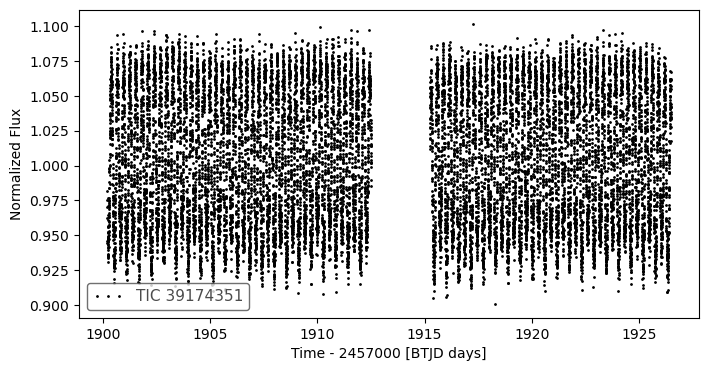

In [3]:
lc = search[0].download().normalize().remove_outliers(sigma=3.5)
fig, ax = plt.subplots(figsize=(8,4))
lc.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1)
plt.show()

In [4]:
time, flux, error = (lc.time.value, lc.flux.value, lc.flux_err)
lc_feets = [time, flux, error]

In [5]:
%%time
fs = feets.FeatureSpace(data=['magnitude', 'time', 'error'], only=['Amplitude', 'LinearTrend', 'MaxSlope', 'Mean', 'Meanvariance', 'MedianAbsDev', 'Std', 'PeriodLS', 'Period_fit', 'Psi_CS', 'Psi_eta', 'Freq1_harmonics_amplitude_0', 'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_rel_phase_0', 'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2', 'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_rel_phase_0', 'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2', ])
features, values = fs.extract(*lc_feets)
table = pd.DataFrame(data=[values], columns=[features])
table

CPU times: total: 2min 2s
Wall time: 2min 1s


,Amplitude,Freq1_harmonics_amplitude_0,Freq1_harmonics_amplitude_1,Freq1_harmonics_amplitude_2,Freq1_harmonics_rel_phase_0,Freq1_harmonics_rel_phase_1,Freq1_harmonics_rel_phase_2,Freq2_harmonics_amplitude_0,Freq2_harmonics_amplitude_1,Freq2_harmonics_amplitude_2,...,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,PeriodLS,Period_fit,Psi_CS,Psi_eta,Std
0,0.075503,0.065788,0.003733,0.000091,0.0,-0.779612,0.670634,0.006702,0.000743,0.002537,...,-0.000023,66.841187,1.002961,0.047802,0.044053,0.286761,0.0,0.257473,0.085805,0.047944
